# Import Dataset

In [1]:
import os
import pandas as pd

def load_table(path: str) -> pd.DataFrame:
    ext = os.path.splitext(path)[1].lower()
    if ext in [".parquet", ".pqt"]:
        # 优先用 pyarrow，失败则尝试 fastparquet
        try:
            return pd.read_parquet(path, engine="pyarrow")
        except Exception:
            return pd.read_parquet(path, engine="fastparquet")
    elif ext in [".feather", ".ft"]:
        # feather 需要 pyarrow
        import pyarrow  # 如果没装会报错，按需 pip/conda 安装
        return pd.read_feather(path)
    elif ext in [".csv", ".txt"]:
        # 大文件可加 dtype、usecols、chunksize 等优化
        return pd.read_csv(path)
    elif ext in [".jsonl", ".json"]:
        # 行式 JSON
        try:
            return pd.read_json(path, lines=True)
        except ValueError:
            return pd.read_json(path)
    else:
        raise ValueError(f"Unsupported file extension: {ext}")

def resolve_path(filename: str) -> str:
    dh_dir = "/uss/hdsi-prismdata"
    local_dir = r"C:\Users\kangy\dsc180a-prism-data\data"
    dh_path = os.path.join(dh_dir, filename)
    if os.path.exists(dh_path):
        return dh_path
    return os.path.join(local_dir, filename)

inflows  = load_table(resolve_path("q1-ucsd-inflows.parquet"))
outflows = load_table(resolve_path("q1-ucsd-outflows.parquet"))


print("inflows:", inflows.shape, "outflows:", outflows.shape)


inflows: (513115, 6) outflows: (513115, 6)


In [2]:
inflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [3]:
outflows

,prism_consumer_id,prism_account_id,memo,amount,posted_date,category
0,0,acc_0,PAYCHECK,2477.02,2022-03-18,PAYCHECK
1,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-10-25,EXTERNAL_TRANSFER
2,0,acc_0,MISCELLANEOUS,6.29,2022-08-26,MISCELLANEOUS
3,0,acc_0,EXTERNAL_TRANSFER,277.00,2022-06-03,EXTERNAL_TRANSFER
4,0,acc_0,EXTERNAL_TRANSFER,100.00,2022-07-29,EXTERNAL_TRANSFER
...,...,...,...,...,...,...
513110,5941,acc_9524,EXTERNAL_TRANSFER,8.66,2023-01-21,EXTERNAL_TRANSFER
513111,5941,acc_9524,EXTERNAL_TRANSFER,267.13,2023-01-23,EXTERNAL_TRANSFER
513112,5941,acc_9524,EXTERNAL_TRANSFER,2.00,2023-01-24,EXTERNAL_TRANSFER
513113,5941,acc_9524,EXTERNAL_TRANSFER,207.16,2023-01-24,EXTERNAL_TRANSFER


In [4]:
%store inflows
%store outflows

Stored 'inflows' (DataFrame)
Stored 'outflows' (DataFrame)


# Data Exploration

In [5]:
# total number of accounts
inflows['prism_consumer_id'].nunique(), outflows['prism_consumer_id'].nunique()

(2974, 2974)

We see here that the number of accounts (represented by the number of prism consumer id's) is different for the inflows and the outflows datasets. This indicates that not every consumer is listed in both. A possible explanation is that some consumers only have inflows or only outflows during this period, but it could also be a data collection issue, so it is something we can look into later

## Looking at 'value_counts' for each dataset

### Inflows

In [6]:
inflows['category'].value_counts()

category
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [7]:
inflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

For inflows, the same 14 categories are listed under 'category' and 'memo'

### Outflows

In [8]:
outflows['category'].value_counts()

category
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

In [9]:
outflows['memo'].value_counts()

memo
EXTERNAL_TRANSFER        156533
SELF_TRANSFER            110437
DEPOSIT                   61345
MISCELLANEOUS             55648
PAYCHECK                  33138
PAYCHECK_PLACEHOLDER      26087
REFUND                    23220
INVESTMENT_INCOME         17325
SMALL_DOLLAR_ADVANCE      13621
OTHER_BENEFITS             7708
TAX                        3405
LOAN                       2513
UNEMPLOYMENT_BENEFITS      1961
INSURANCE                   174
Name: count, dtype: int64

For outflows, there are more general categories and a significantly larger variety of memos. While some memos contain broad categories like 'EXTERNAL_TRANSFER' and 'AUTOMOTIVE', most of the memos include more detailed descriptions that reflect specific transactions. These memos are likely to contain valuable insight into spending habits and patterns from a consumer level.

## Average spending on each category

### Inflows

In [10]:
# avg spending on each category for inflows
inflows.groupby('category')['amount'].mean()

category
DEPOSIT                  1085.701257
EXTERNAL_TRANSFER         521.207874
INSURANCE                1945.482874
INVESTMENT_INCOME         397.534104
LOAN                     1683.927867
MISCELLANEOUS             945.124939
OTHER_BENEFITS           1579.636412
PAYCHECK                 1630.108042
PAYCHECK_PLACEHOLDER     1368.733918
REFUND                    232.835498
SELF_TRANSFER             437.367213
SMALL_DOLLAR_ADVANCE      139.974706
TAX                      1650.396999
UNEMPLOYMENT_BENEFITS     821.223758
Name: amount, dtype: float64

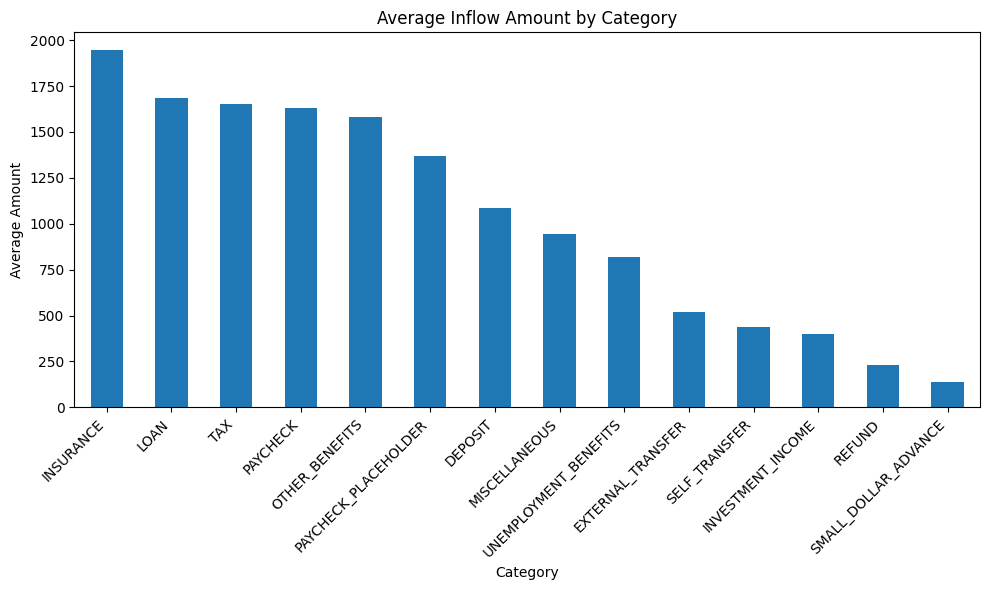

In [11]:
import matplotlib.pyplot as plt

# group and aggregate (mean or sum)
category_amount = inflows.groupby('category')['amount'].mean().sort_values(ascending=False)

# plot bar chart
category_amount.plot(kind='bar', figsize=(10,6))
plt.title('Average Inflow Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Outflows

In [12]:
# avg spending on each category for outflows
outflows.groupby('category')['amount'].mean()

category
DEPOSIT                  1085.701257
EXTERNAL_TRANSFER         521.207874
INSURANCE                1945.482874
INVESTMENT_INCOME         397.534104
LOAN                     1683.927867
MISCELLANEOUS             945.124939
OTHER_BENEFITS           1579.636412
PAYCHECK                 1630.108042
PAYCHECK_PLACEHOLDER     1368.733918
REFUND                    232.835498
SELF_TRANSFER             437.367213
SMALL_DOLLAR_ADVANCE      139.974706
TAX                      1650.396999
UNEMPLOYMENT_BENEFITS     821.223758
Name: amount, dtype: float64

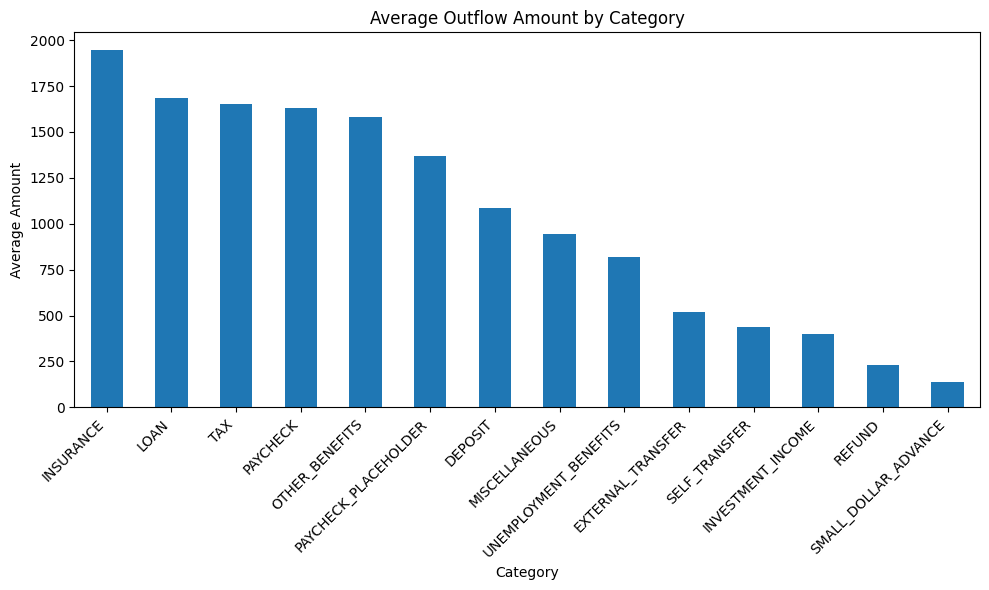

In [13]:
# group and aggregate (mean or sum)
category_amount = outflows.groupby('category')['amount'].mean().sort_values(ascending=False)

# plot bar chart
category_amount.plot(kind='bar', figsize=(10,6))
plt.title('Average Outflow Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Checking the date range of the dataset

In [14]:
# date range for the inflows & outflows
inflows['posted_date'].min(), inflows['posted_date'].max(), '\n', outflows['posted_date'].min(), outflows['posted_date'].max()

(datetime.date(2017, 12, 29),
 datetime.date(2023, 8, 1),
 '\n',
 datetime.date(2017, 12, 29),
 datetime.date(2023, 8, 1))

We can see that both datasets have the same date range of ~5 years from December 29, 2017 to August 1, 2023

### Median Monthly Inflow vs Outflow per User

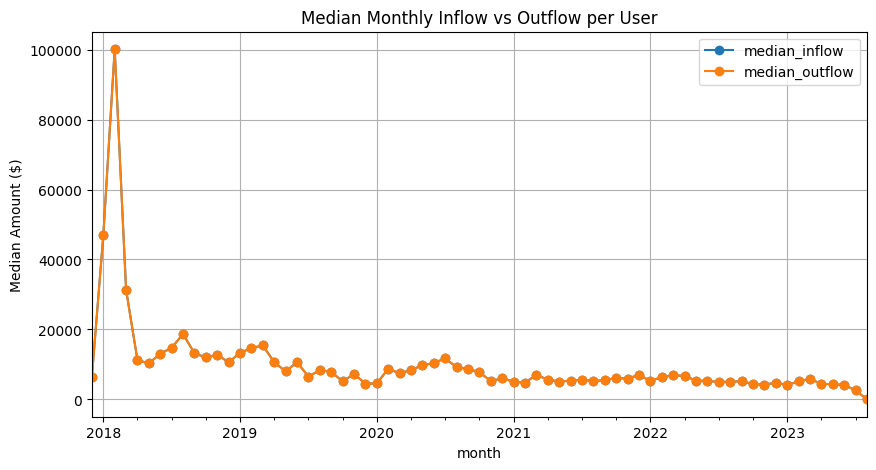

In [15]:
# Converts the dates in each dataset to datetime to extract the months
inflows['posted_date'] = pd.to_datetime(inflows['posted_date'])
outflows['posted_date'] = pd.to_datetime(outflows['posted_date'])

inflows['month'] = inflows['posted_date'].dt.to_period('M').dt.to_timestamp()
outflows['month'] = outflows['posted_date'].dt.to_period('M').dt.to_timestamp()

# Calculates median inflow amount per month per customer
median_inflow = (
    inflows.groupby(['month','prism_consumer_id'])['amount'].sum()
    .groupby('month')
    .median()
    .reset_index(name='median_inflow')
)

median_outflow = (
    outflows.groupby(['month','prism_consumer_id'])['amount'].sum()
    .groupby('month')
    .median()
    .reset_index(name='median_outflow')
)

# Plot chart
monthly_medians = pd.merge(median_inflow, median_outflow, on='month', how='outer')
monthly_medians.plot(x='month', y=['median_inflow','median_outflow'], marker='o', figsize=(10,5))
plt.title('Median Monthly Inflow vs Outflow per User')
plt.ylabel('Median Amount ($)')
plt.grid(True)
plt.show()

The median monthly inflow and outflow per user were plotted to identify possible seasonal trends. Median was used instead of the mean in hopes to get rid of any outliers. Both inflows and outflows peaked in the very beginning and gradually declined and stabilized. This suggests that early users had higher transaction volumes and could be more indicitave of the users themselves as opposed to any general seasonal trends. As a result, no clear monthly or seasonal spending trends were observed, indicating stable consumer behavior over time.

### do we want to keep this (?)

### Inspect the spending on GROCERIES category

In [16]:
# spending in GROCERIES category
outflows[outflows['category']=='GROCERIES'].groupby('memo')['amount'].mean().sort_values(ascending=True)

Series([], Name: amount, dtype: float64)

## Most common merchants per category

In [17]:
top_merchants = (
    inflows.groupby('category')['memo']
      .agg(lambda x: x.value_counts().index[0])
      .reset_index(name='most_common_merchant')
)

print(top_merchants)

                 category   most_common_merchant
0                 DEPOSIT                DEPOSIT
1       EXTERNAL_TRANSFER      EXTERNAL_TRANSFER
2               INSURANCE              INSURANCE
3       INVESTMENT_INCOME      INVESTMENT_INCOME
4                    LOAN                   LOAN
5           MISCELLANEOUS          MISCELLANEOUS
6          OTHER_BENEFITS         OTHER_BENEFITS
7                PAYCHECK               PAYCHECK
8    PAYCHECK_PLACEHOLDER   PAYCHECK_PLACEHOLDER
9                  REFUND                 REFUND
10          SELF_TRANSFER          SELF_TRANSFER
11   SMALL_DOLLAR_ADVANCE   SMALL_DOLLAR_ADVANCE
12                    TAX                    TAX
13  UNEMPLOYMENT_BENEFITS  UNEMPLOYMENT_BENEFITS


In [18]:
top_merchants = (
    outflows.groupby('category')['memo']
      .agg(lambda x: x.value_counts().index[0])
      .reset_index(name='most_common_merchant')
)

print(top_merchants)

                 category   most_common_merchant
0                 DEPOSIT                DEPOSIT
1       EXTERNAL_TRANSFER      EXTERNAL_TRANSFER
2               INSURANCE              INSURANCE
3       INVESTMENT_INCOME      INVESTMENT_INCOME
4                    LOAN                   LOAN
5           MISCELLANEOUS          MISCELLANEOUS
6          OTHER_BENEFITS         OTHER_BENEFITS
7                PAYCHECK               PAYCHECK
8    PAYCHECK_PLACEHOLDER   PAYCHECK_PLACEHOLDER
9                  REFUND                 REFUND
10          SELF_TRANSFER          SELF_TRANSFER
11   SMALL_DOLLAR_ADVANCE   SMALL_DOLLAR_ADVANCE
12                    TAX                    TAX
13  UNEMPLOYMENT_BENEFITS  UNEMPLOYMENT_BENEFITS


**The most common merchants for most of the category are basically the same as their category name, some meaningful ones that are not the same are:**
<br>

In [19]:
top_merchants[top_merchants['category']!=top_merchants['most_common_merchant']]

,category,most_common_merchant


# Train/Test Split

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import ks_2samp

Performing a train-test-split with 75% train and 25% test. We are splitting them by the `prism_consumer_ids` and are creating two different sets for both the inflows and outflows.

## Inflows

In [21]:
### Train/Test Split
unique_consumer_ids = inflows['prism_consumer_id'].unique()

inflows_train_ids, inflows_test_ids = train_test_split(
    unique_consumer_ids,
    test_size=0.25,
    random_state=42,
)

inflows_train_df = inflows[inflows['prism_consumer_id'].isin(inflows_train_ids)]
inflows_test_df  = inflows[inflows['prism_consumer_id'].isin(inflows_test_ids)]

print(f'Train Shape: {inflows_train_df.shape}')
print(f'Test Shape: {inflows_test_df.shape}')

Train Shape: (385779, 7)
Test Shape: (127336, 7)


### I. Category Distribution Comparison
The first statistical test conducted was a comparison in the category distribution between the train and test sets to ensure no bias. Each category's relative frequency and was calculated, along with the absolute difference. Because the absolute differences are relatively small, generally smaller than 0.015, this shows that there is consistency between the sets.

In [22]:
# Comparing category distribution between sets
in_cat_distribution = pd.DataFrame({
    'train': inflows_train_df['category'].value_counts(normalize=True),
    'test':  inflows_test_df['category'].value_counts(normalize=True)
})
in_cat_distribution['absolute_diff'] = (in_cat_distribution['train'] - in_cat_distribution['test']).abs()

in_cat_distribution

,train,test,absolute_diff
category,,,
DEPOSIT,0.121181,0.114626,0.006555
EXTERNAL_TRANSFER,0.308342,0.295133,0.013210
INSURANCE,0.000389,0.000188,0.000200
INVESTMENT_INCOME,0.034305,0.032128,0.002177
LOAN,0.004656,0.005631,0.000975
MISCELLANEOUS,0.104969,0.119000,0.014031
OTHER_BENEFITS,0.013619,0.019272,0.005653
PAYCHECK,0.063998,0.066352,0.002354
PAYCHECK_PLACEHOLDER,0.049969,0.053481,0.003512


### II. KS Sample
The second statistical test performed was a two-sample KS test which compares the distributions of the median transaction amounts per customer between the training and test sets. Because the KS statistic was small (0.038) and the p-value (0.385) is greater than > 0.05, this indicates that there is no significant difference between the distributions


In [23]:
in_train_median = inflows_train_df.groupby('prism_consumer_id')['amount'].median()
in_test_median = inflows_test_df.groupby('prism_consumer_id')['amount'].median()

print(ks_2samp(in_train_median, in_test_median))

KstestResult(statistic=np.float64(0.03795626597232268), pvalue=np.float64(0.385021769005963), statistic_location=np.float64(84.42), statistic_sign=np.int8(1))


### Outflows

In [24]:
### Train/Test Split
unique_consumer_ids = outflows['prism_consumer_id'].unique()

outflows_train_ids, outflows_test_ids = train_test_split(
    unique_consumer_ids,
    test_size=0.25,
    random_state=42,
)

outflows_train_df = outflows[outflows['prism_consumer_id'].isin(outflows_train_ids)]
outflows_test_df  = outflows[outflows['prism_consumer_id'].isin(outflows_test_ids)]

print(f'Train Shape: {outflows_train_df.shape}')
print(f'Test Shape: {outflows_test_df.shape}')

Train Shape: (385779, 7)
Test Shape: (127336, 7)


### I. Category Distribution Comparison
Similar to the inflows splits, we conduced a category distribution comparison. Because the absolute differences are relatively small, generally smaller than 0.012, this shows that there is consistency between the sets.


In [25]:
# Comparing category distribution between sets
out_cat_distribution = pd.DataFrame({
    'train': outflows_train_df['category'].value_counts(normalize=True),
    'test':  outflows_test_df['category'].value_counts(normalize=True)
})
out_cat_distribution['absolute_diff'] = (out_cat_distribution['train'] - out_cat_distribution['test']).abs()

out_cat_distribution

,train,test,absolute_diff
category,,,
DEPOSIT,0.121181,0.114626,0.006555
EXTERNAL_TRANSFER,0.308342,0.295133,0.013210
INSURANCE,0.000389,0.000188,0.000200
INVESTMENT_INCOME,0.034305,0.032128,0.002177
LOAN,0.004656,0.005631,0.000975
MISCELLANEOUS,0.104969,0.119000,0.014031
OTHER_BENEFITS,0.013619,0.019272,0.005653
PAYCHECK,0.063998,0.066352,0.002354
PAYCHECK_PLACEHOLDER,0.049969,0.053481,0.003512


### II. KS Sample
Similar to the inflows splits, we conduced a twp-sample KS test. Because the KS statistic was small (0.046) and the p-value (0.173) is greater than > 0.05, this indicates that there is no significant difference between the distributions.

In [26]:
# Amount comparison
out_train_median = outflows_train_df.groupby('prism_consumer_id')['amount'].median()
out_test_median = outflows_test_df.groupby('prism_consumer_id')['amount'].median()

print(ks_2samp(out_train_median, out_test_median))

KstestResult(statistic=np.float64(0.03795626597232268), pvalue=np.float64(0.385021769005963), statistic_location=np.float64(84.42), statistic_sign=np.int8(1))
